In [1]:
#Setting working directory
import os
path = 'E:\\Imarticus\\DSP22\\python'
os.chdir(path)
print(os.getcwd())

E:\Imarticus\DSP22\python


In [2]:
import pandas as pd
import numpy as np
Diabetes=pd.read_csv('Diabetes.csv')

In [3]:
Diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [155]:
# Objective of Logistic Regression: predict if someone has diabetes (Outcome=1) 
# Description of the data:
  # Pregnancies: Number of times pregnant
  # Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  # BloodPressure: Diastolic blood pressure (mm Hg)
  # SkinThickness: Triceps skin fold thickness (mm)
  # Insulin: 2-Hour serum insulin (mu U/ml)
  # BMI: Body mass index (weight in kg/(height in m)^2)
  # DiabetesPedigreeFunction: Diabetes pedigree function
  # Age: Age (years)
  # Class Label: Outcome: Class variable (0 or 1)

In [156]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']

Diabetes = pd.read_csv('Diabetes.csv', header=0, names=col_names)

In [157]:
Diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
# Note that label = 1 implies diabetec and 0 implies non-diabetic

In [161]:
# The data are unbalanced with 35% of observations having diabetes. 

In [14]:
#To check if the data is equally balanced between the target classes
Diabetes['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

In [15]:
# Definitely a case of Class Imbalance

In [16]:
X = Diabetes.iloc[:,:8]
y = Diabetes.iloc[:,8]

In [17]:
X.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [19]:
# Notice that X is a matrix,
type(X)

pandas.core.frame.DataFrame

In [20]:
# Notice that y is a vector
type(y)

pandas.core.series.Series

In [163]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [164]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [165]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [24]:
#Score?
logreg.score(X_test,y_test)

0.8072916666666666

In [25]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8072916666666666


In [26]:
# What is the difference in the above two Though results are same.

In [27]:
# Accuracy may not be the right measure at times, especially if your Target class is not balanced 

In [28]:
# Now that we have the accuracy, what shall we do next?
# Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [29]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [30]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, 
# we can simply calculate the mean = percentage of ones
y_test.mean()

0.3229166666666667

In [31]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [32]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [33]:
# This means that a dumb model that always predicts 0 would be right 68% of the time
  # This shows how classification accuracy is not that good as it's close to a dumb model
  # It's a good way to know the minimum we should achieve with our models

In [35]:
# print the first 25 true and predicted responses
print('Actual   :', y_test.values[0:25])
print('Predicted:', y_pred_class[0:25])

Actual   : [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Predicted: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [36]:
# This sort of accuracy score does not tell you the "types" of errors
# Classification accuracy alone can be misleading if you have an unequal 
   # number of observations in each class or if you have more than two classes

In [37]:
# CONFUSION MATRIX
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[119  11]
 [ 26  36]]


In [38]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [39]:
# Remember that Python's Confusion Matrix is inverted of what you see in most Internet articles
# tn, fp, fn, tp is the output order of "metrics.confusion_matrix" [Could be different with different languages]
# Refer Documentation for more details: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

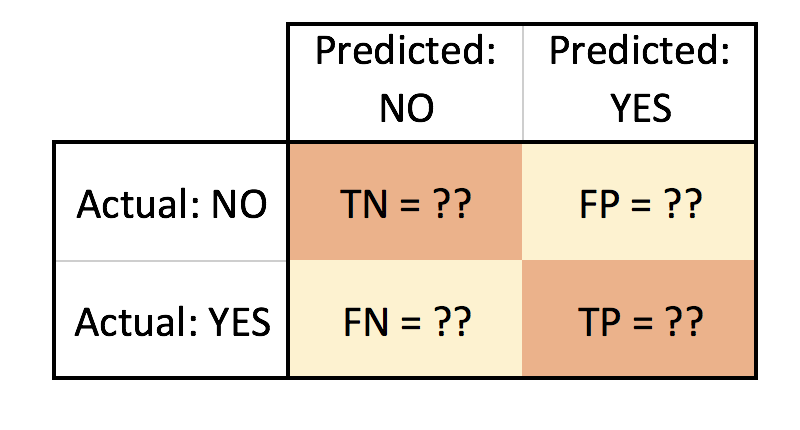

In [40]:
from IPython.display import Image
Image(filename='ConfusionMatrix.png')

In [41]:
# Extracting Information from our Confusion Matrix:
   # True Positives (TP): we correctly predicted that they do have diabetes
     # 36
   # True Negatives (TN): we correctly predicted that they don't have diabetes
     # 119
   # False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
     # 11
     # A.K.A "Type I error"
   # False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")
     # 26
     # A.K.A "Type II error"

In [42]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[119  11]
 [ 26  36]]


In [166]:
# The most basic accuracy of the model is (TP + TN) / Total
# Which is, the total true predictions (properly classified) divided by total number of predictions
# use float to perform true division, not integer division
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8072916666666666
0.8072916666666666


In [44]:
# Classification Error (Misclassification Rate) or (Error rate):
# Overall, how often is the classifier incorrect?
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
# Alternatively, 1 - accuracy also gives the error rate
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.19270833333333334
0.19270833333333337


In [45]:
#SENSITIVITY  => True Positive Rate (TPR)  => RECALL
 # When the actual value is positive, or yes, or True, or 1, how often is the positive prediction correct?
 # It is the measure of the probability that your estimate or prediction is 1 
   # given all the samples whose true class label is 1. 
 # It is a measure of how many of the positive samples have been identified as being positive.
 # Example: Of all patients in the set that actually have cancer, what fraction did we correctly detect?
 # Something we want to maximize
 # How "sensitive" is the classifier to detecting positive instances?
 # Out of all the positive classes, how much we predLcted correctly.
 # Also known as "True Positive Rate" or "Recall"
 # The best sensitivity is 1.0, whereas the worst is 0.0.
 # However, having a recall of 1 is not necessarily good, as a model which classifies everything 
   # as spam/cancer/diabetic has recall equal to 1, but also very low precision, as there will be a lot of false positives.
 # TP / all positive
        # all positive = TP + FN
sensitivity = TP / float(FN + TP)

print(sensitivity)
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, y_pred_class))

0.5806451612903226
0.5806451612903226


In [46]:
# Sensitivity in our Classifier is not so good!
# So, around 42% of the Diabetic Patients were not correctly identified.
# When one is diabetic, it is not able to predict that well

In [47]:
# Alternative way of calculating SENSITIVITY  => True Positive Rate (TPR)
## Extract just the True positives
trueInput=X_test[y_test==1]
trueOutput=y_test[y_test==1]
##Find True positive rate
np.mean(logreg.predict(trueInput)==trueOutput)

0.5806451612903226

In [48]:
# SPECIFICITY => True Negative Rate (TNR)
 # When the actual value is negative or no or False or 0, how often is the negative prediction correct?
 # Specificity is the measure of the probability that your estimate is 0 
    #given all the samples whose true class label is 0. 
 # It is a measure of how many of the negative samples have been identified as being negative.
 # Something we want to maximize
 # How "specific" (or "selective") is the classifier in predicting negative instances?
 # equivalent to 1 minus False Positive Rate (will discuss later on FPR)
 # The best specificity is 1.0, whereas the worst is 0.0.
 # TN / all negative
     # all negative = TN + FP
specificity = TN / (TN + FP)
print(specificity)
# Though 'false_positive_rate' will be calculated later
print (1-false_positive_rate)

0.9153846153846154


NameError: name 'false_positive_rate' is not defined

In [49]:
# Specificity in our Classifier is very good!
# When one is not diabetic, it is able to predict that well

In [50]:
# Alternative way of calculating SPECIFICITY  => True Negative Rate (TNR)
## Extract just the True positives
falseInput=X_test[y_test==0]
falseOutput=y_test[y_test==0]
##Find True positive rate
np.mean(logreg.predict(falseInput)==falseOutput)

0.9153846153846154

In [51]:
# False Positive Rate
 # When the actual value is negative, how often is the positive prediction incorrect?
 # the number of incorrect positive predictions divided by the total number of negatives.
 # The best false positive rate is 0.0 whereas the worst is 1.0
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
# It can also be calculated as 1 – specificity.
print(1 - specificity)

0.08461538461538462
0.08461538461538465


In [52]:
# PRECISION
 # When a positive value is predicted, how often is the prediction correct?
 # How "precise" is the classifier when predicting positive instances?
 # It is a measure of the probability that a sample is a true positive class 
 # given that your classifier said it is positive.
 # Example: Of all patients we predicted have cancer, what fraction of them actually have cancer?
 # The best precision is 1.0, whereas the worst is 0.0.
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7659574468085106
0.7659574468085106


In [53]:
# Precision Vs Recall
#  While recall expresses the ability to find all relevant instances 
    # in a dataset, precision expresses the proportion of the data points 
    # our model says was relevant actually were relevant.
# While testing with multiple algos, you can compare their outputs to see which one works best
# Example usage: in case of an algorithm for fraud detection, recall is a more important metric. 
  # It is obviously important to catch every possible fraud even if it means that 
  # the authorities might need to go through some false positives. 
# Same is the case in a medical context, recall or Sensitivity (TPR) is used to see 
  # how many of the positive cases are correctly picked up. You cannot afford to miss critical cases

# What about Spam prediction then?

# On the other hand, if the algorithm is created for sentiment analysis and all you need is 
# a high-level idea of emotions indicated in tweets then aiming for precision is the way to go.

In [54]:
# Examples:
  # False negatives, i.e. Falsely saying not-spam (spam goes to the inbox) are more acceptable 
  # than false positives, i.e. Falsely saying spam (non-spam is caught by the spam filter)

# On the contrary----

  # False negatives, i.e. Falsely saying not-cancer (not treated for cancer) are NOT acceptable 
  # than false positives, i.e. Falsely saying canserous (and treated for cancer)

# What can you do about it? Use ROC curve and change thresholds?

In [55]:
# Adjusting the classification Threshold

In [56]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [57]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[0.10454348, 0.89545652],
       [0.78657722, 0.21342278],
       [0.85903762, 0.14096238],
       [0.39700156, 0.60299844],
       [0.82780622, 0.17219378],
       [0.92380813, 0.07619187],
       [0.31009664, 0.68990336],
       [0.25112061, 0.74887939],
       [0.55752904, 0.44247096],
       [0.62417548, 0.37582452]])

In [58]:
# Notice that sum of the two classes are always 1.
# BUT, how do you know which column belongs to what class, 0-class or 1-class?
logreg.classes_

array([0, 1], dtype=int64)

In [59]:
# So, first column is 0-class! Yeh.
# column 0: predicted probability that each observation is a member of class 0
# column 1: predicted probability that each observation is a member of class 1

In [60]:
# How does the prediction of a class happen using the probabilities?

In [61]:
# Let us take a sample of column 1 (not column 0) 
# that represents class-1 probabilities- For a visual understanding
logreg.predict_proba(X_test)[0:10, 1]

array([0.89545652, 0.21342278, 0.14096238, 0.60299844, 0.17219378,
       0.07619187, 0.68990336, 0.74887939, 0.44247096, 0.37582452])

In [62]:
# There is a 0.5 classification threshold by default
# Class 1 is predicted if probability > 0.5
# Class 0 is predicted if probability < 0.5

In [63]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [64]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

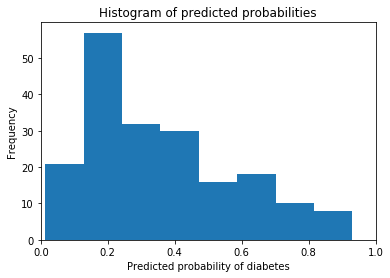

In [65]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [66]:
# Observations from the above Histogram of Prediction Probabilities:
  # About 45% of observations have probability from 0.2 to 0.3
  # Small number of observations with probability > 0.5
  # This is below the threshold of 0.5
  # Most would be predicted "no diabetes" in this case

In [67]:
# What is the solution for increasing the 'Diabetic' prediction?
# In other words, we want to increse the TP
# So, Decrease the threshold for predicting diabetes
# That means, Increase the sensitivity of the classifier

In [68]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class_new = binarize(np.atleast_2d(y_pred_prob), 0.3)[0]

In [69]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.89545652, 0.21342278, 0.14096238, 0.60299844, 0.17219378,
       0.07619187, 0.68990336, 0.74887939, 0.44247096, 0.37582452])

In [70]:
# Default Probability Classes
logreg.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [71]:
# Adjusted Probability Classes
y_pred_class_new[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 1.])

In [72]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[119  11]
 [ 26  36]]


In [73]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class_new))

[[86 44]
 [ 8 54]]


In [74]:
# What is the new Sensitivity Score? 
# sensitivity must have increased (Old value was: 0.5806451612903226)
print (54 / float(26 + 36))

0.8709677419354839


In [75]:
# specificity must have decreased (Old value was: 0.9153846153846154)
print(86 / float(86 + 44))

0.6615384615384615


In [76]:
# Notice that Sensitivity and specificity have an inverse relationship
# Increasing one would always decrease the other
# We conclude that Threshold can be adjusted to increase sensitivity or specificity
# Adjusting the threshold should be one of the last step you do in the model-building process

In [77]:
# While changing the threshold value is impacting the sensitivity and specificity
# and that, we must change is depending on the problem at hand
# Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds?

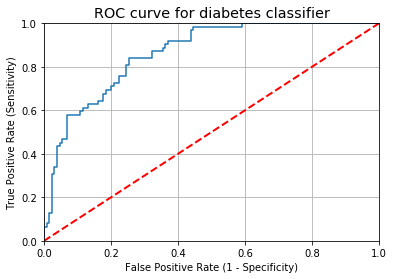

In [78]:
# ROC Curve #
#############
# This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds.
# IMPORTANT: first argument is true values, second argument is predicted probabilities
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [79]:
## Interpreting ROC Curve ##
# If your true positive rate is 0.25 it means that every time you call a positive, 
   # you have a probability of 0.75 of being wrong.

# depicts relative trade-offs between 
  # benefits (true positives) and
  # costs (false positives)

# Point (0,1) is the perfect classifier- classifies all positive cases and negative cases correctly. 
  # It is (0,1) because the false positive rate is 0 (none), and the true positive rate is 1 (all).
  # Commits no false positive errors, and gets all true positives

# Point (0,0) represents a classifier that predicts all cases to be negative, 
  # Never issue a positive classification! 
  # Commits no false positive errors, but also gains no true positives

# Point (1,1) corresponds to a classifier that predicts every case to be positive.
  # Unconditionally issue positive classification!
  # Predicts all positive instances correctly at the cost of predicting all negative instances wrongly

# Point (1,0) is the classifier that is incorrect for all classifications. 

# In many cases, a classifier has a parameter that can be adjusted 
  # to increase TP at the cost of an increased FP or decrease FP at the cost of a decrease in TP. 
# Each parameter setting provides a (FP, TP) pair and a series of such pairs can be used to plot an ROC curve

# ML Algorithms that produce probabilistic outputs (Logistic Regression, Naive Bayes etc.) 
   # can be better represented with ROC curves because different thresholds 
   # will produce different values in the ROC curve
 # A simple decision tree classifier produces the class labels directly, and can represent just a point in ROC curve

In [80]:
thresholds

array([0.93085792, 0.88188339, 0.86168212, 0.8372052 , 0.8346633 ,
       0.78927292, 0.78370451, 0.68726315, 0.68499661, 0.67399059,
       0.67382128, 0.62049285, 0.61810938, 0.61124625, 0.60316118,
       0.60299844, 0.56949978, 0.53253113, 0.47472345, 0.47378503,
       0.47322612, 0.4707139 , 0.45866355, 0.45763723, 0.44247096,
       0.43298515, 0.42679491, 0.40852282, 0.40733654, 0.40509922,
       0.39691619, 0.39390604, 0.39225774, 0.39221081, 0.37582452,
       0.36736493, 0.36196186, 0.35735222, 0.35697003, 0.3436454 ,
       0.31041805, 0.30276726, 0.297204  , 0.29103781, 0.28456741,
       0.27923145, 0.27161359, 0.26856267, 0.24892356, 0.23961028,
       0.23550138, 0.22972325, 0.18785473, 0.18682027, 0.01272256])

In [81]:
thresholds[17]

0.5325311339609673

In [82]:
tpr[17]

0.5806451612903226

In [83]:
tpr[41]

0.8709677419354839

In [84]:
thresholds[-1]

0.012722557202613565

In [85]:
tpr[thresholds > 0.5]

array([0.01612903, 0.06451613, 0.06451613, 0.08064516, 0.08064516,
       0.12903226, 0.12903226, 0.30645161, 0.30645161, 0.33870968,
       0.33870968, 0.43548387, 0.43548387, 0.4516129 , 0.4516129 ,
       0.46774194, 0.46774194, 0.58064516])

In [86]:
# Now that we have the TPR, FPR and Thresholds values, 
# can we not define a function that can give us Sensitivity and Specificity values?

In [87]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [88]:
evaluate_threshold(0.5)

Sensitivity: 0.5806451612903226
Specificity: 0.9307692307692308


In [89]:
evaluate_threshold(0.3)

Sensitivity: 0.8709677419354839
Specificity: 0.676923076923077


In [90]:
# AUC is the percentage of the ROC plot that is underneath the curve
# AUC is useful as a single number summary of classifier performance
# Higher value = better classifier
# AUC is useful even when there is high class imbalance (unlike classification accuracy)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8641439205955335


In [91]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8246837606837607

In [92]:
# What about Model Coefficients?
# In addition to predicting the outcome, the model can be used to see 
# which variables are influencing the probabilities of having diabetes.

In [93]:
coef_DF=pd.DataFrame(data={'Variable':list(X),
'value':(logreg.coef_[0])})

In [94]:
coef_DF

,Variable,value
0,pregnant,0.083480
1,glucose,0.025563
2,bp,-0.016491
3,skin,0.005591
4,insulin,-0.000539
5,bmi,0.054320
6,pedigree,0.603448
7,age,0.012353


In [95]:
# Notice that most of the variables are increasing the probabilities of having diabetes.
# However, it’s hard to detect which one is the “stronger” because 
# the standard deviation of the different coefficients is so different. 
# To do such a comparison, we need to standardize the coefficients. 
# The idea is to correct the coefficient by the variance of the variable.

In [96]:
coef_DF_standardised=pd.DataFrame(data={'Variable':list(X),
'value':(logreg.coef_[0])*np.std(X,axis=0)/np.std(y)})

In [97]:
coef_DF_standardised

,Variable,value
pregnant,pregnant,0.589769
glucose,glucose,1.713649
bp,bp,-0.669255
skin,skin,0.187007
insulin,insulin,-0.130125
bmi,bmi,0.897934
pedigree,pedigree,0.419203
age,age,0.304598


In [109]:
# # F Score: F1-Score
# Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them
# This is a weighted average of the true positive rate (recall) and precision
# F-measure = 2 * Precision * Recall / Precision + Recall
# It is difficult to compare two models with low precision and high recall or vice versa.
# So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time.
f1 = metrics.f1_score(y_test, y_pred_class)
print(f1)

0.6605504587155964


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87       130
          1       0.77      0.58      0.66        62

avg / total       0.80      0.81      0.80       192



In [ ]:
# Adjusting the Predicted Class with a different threshold value

In [117]:
y_pred_class

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [120]:
y_pred_prob

array([0.89545652, 0.21342278, 0.14096238, 0.60299844, 0.17219378,
       0.07619187, 0.68990336, 0.74887939, 0.44247096, 0.37582452,
       0.55678864, 0.89822789, 0.30231053, 0.24892356, 0.17315576,
       0.20605998, 0.80576697, 0.06825102, 0.39225774, 0.31752781,
       0.56736966, 0.3586607 , 0.35697003, 0.09486055, 0.10487365,
       0.37842784, 0.08597707, 0.8346633 , 0.17524784, 0.20001963,
       0.47322612, 0.28456741, 0.13227091, 0.48373439, 0.17639175,
       0.64070469, 0.47378503, 0.13073891, 0.39691619, 0.68499661,
       0.31041805, 0.21887753, 0.23550138, 0.75023822, 0.72338336,
       0.03391282, 0.15529925, 0.27923145, 0.39221081, 0.30328644,
       0.43027277, 0.26067066, 0.82048667, 0.45866355, 0.18596399,
       0.01272256, 0.1107114 , 0.40934645, 0.30276726, 0.24038193,
       0.6321794 , 0.47472345, 0.16059434, 0.7146661 , 0.61124625,
       0.8372052 , 0.62331976, 0.18638965, 0.39967092, 0.1607023 ,
       0.17464241, 0.53125821, 0.14182891, 0.86168212, 0.73947

In [121]:
y_pred_class_Adjusted = np.where(y_pred_prob > 0.3, 1, 0)

In [122]:
y_pred_class_Adjusted

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [123]:
# Dealing with the case of Class Imbalance Problem. Following are some of the Techniques:
# 1. Undersampling of majority class
# 2. Oversampling of minority Class